# 5 Number summary - Min , Q1, Q2, Q3, Max - Utkarsh

In [1]:
import numpy as np

In [2]:
marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]

In [3]:
minimum , Q1, median, Q3, maximum = np.quantile(marks,[0.00,0.25,0.50,0.75,1.00])

In [4]:
minimum , Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [5]:
IQR = Q3 -  Q1

In [6]:
IQR

35.0

In [7]:
upper_fence = Q3 + 1.5*IQR
lower_fence = Q1 - 1.5*IQR

In [8]:
lower_fence, upper_fence

(1.5, 141.5)

No Outliers found in above

<AxesSubplot: >

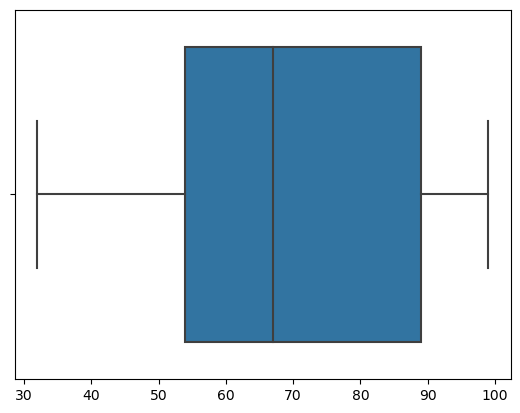

In [9]:
import seaborn as sns
sns.boxplot(x = marks)

In [10]:
marks = [-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 150,170, 180]

<AxesSubplot: >

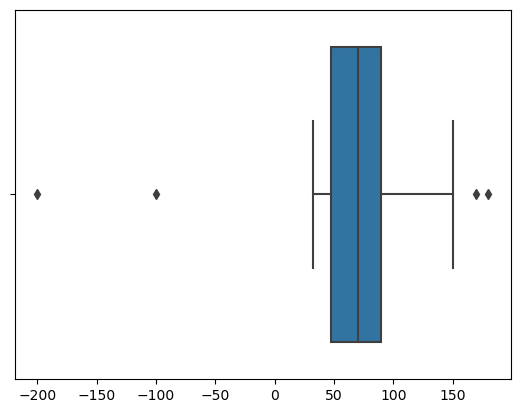

In [11]:
sns.boxplot(x=marks)

## Getting IQR for actual dataframe

In [12]:
# Loading gemstone dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/notebook/data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [14]:
# drop statistically insignificant column , id
df = df.drop(labels=['id'],axis=1)

In [15]:
# Seperating categorical and numeric variables
cat = list(df.columns[df.dtypes == 'object'])
con = list(df.columns[df.dtypes != 'object'])

In [16]:
cat

['cut', 'color', 'clarity']

In [17]:
con

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [18]:
import pandas as pd
import numpy as np
def get_upper_lower_fence(df):
    con = list(df.columns[df.dtypes != 'object'])
    mins = []
    maxs = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    upper_list =[]
    lower_list =[]
    
    for i in con:
        minimum, Q1, Q2, Q3, maximum = np.quantile(df[i], [0,0.25,0.50, 0.75,1])
        IQR = Q3-Q1
        upper = Q3 + 1.5*IQR
        lower = Q3 - 1.5*IQR
        mins.append(minimum)
        Q1_list.append(Q1)
        Q2_list.append(Q2)
        Q3_list.append(Q3)
        maxs.append(maximum)
        upper_list.append(upper)
        lower_list.append(lower)
        
    dct_iqr = {'min':mins , 
               'Q1':Q1_list , 
               'Q2':Q2_list , 
               'Q3':Q3_list , 
               'max':maxs , 
               'lower':lower_list, 
               'upper':upper_list}
    
    df_iqr = pd.DataFrame(dct_iqr)
    
    df_iqr.index = con
    
    return df_iqr           
        

In [19]:
get_upper_lower_fence(df)

,min,Q1,Q2,Q3,max,lower,upper
carat,0.2,0.40,0.70,1.03,3.50,0.085,1.975
depth,52.1,61.30,61.90,62.40,71.60,60.750,64.050
table,49.0,56.00,57.00,58.00,79.00,55.000,61.000
x,0.0,4.70,5.70,6.51,9.65,3.795,9.225
y,0.0,4.71,5.72,6.51,10.01,3.810,9.210
z,0.0,2.90,3.53,4.03,31.30,2.335,5.725
price,326.0,951.00,2401.00,5408.00,18818.00,-1277.500,12093.500


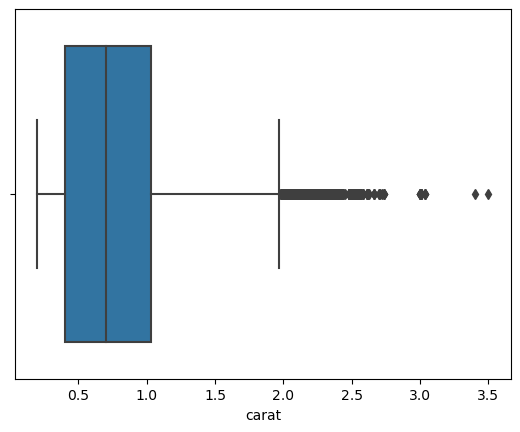

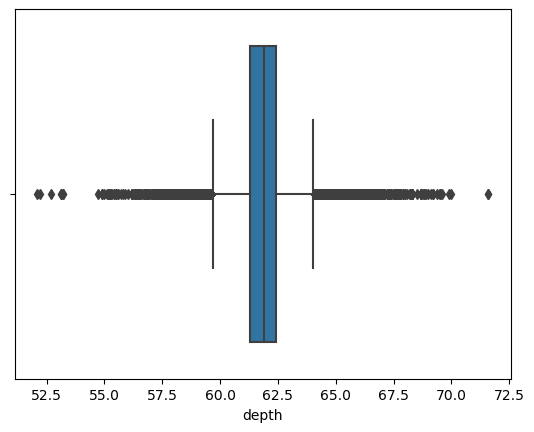

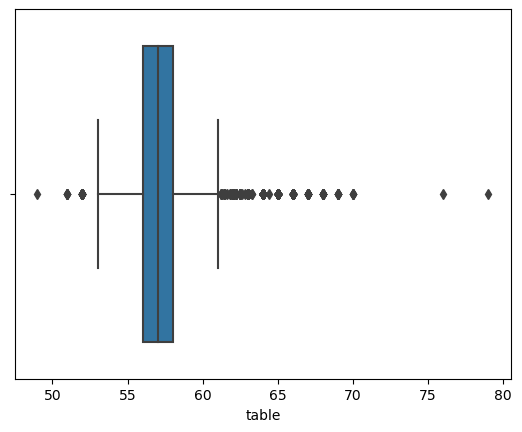

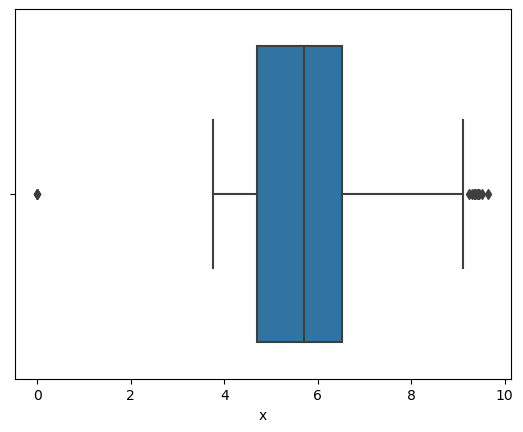

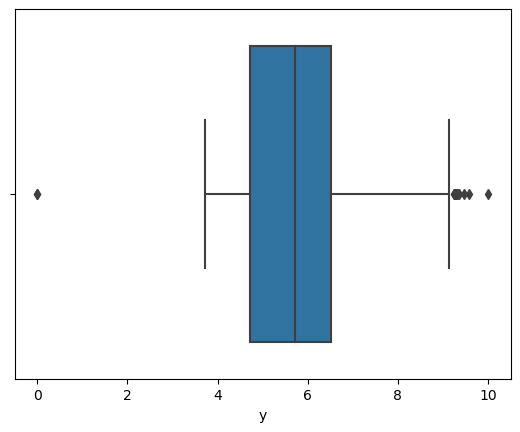

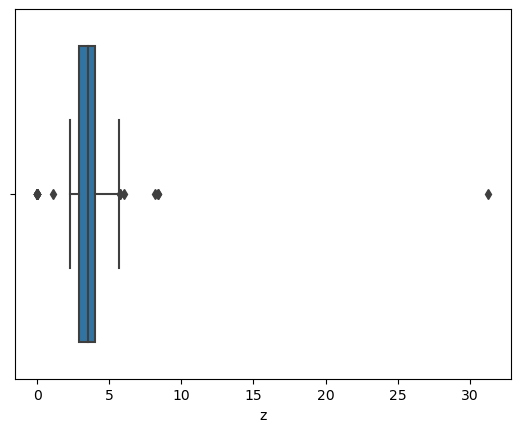

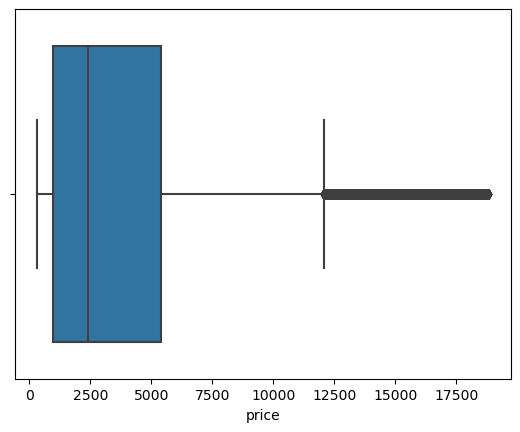

In [20]:
import matplotlib.pyplot as plt
for i in con:
    sns.boxplot(x=df[i])
    print('\n')
    plt.show()